# Numerisk derivasjon
Derivasjon har mange nyttige anvendelser
- Hva den deriverte __er__ kan du lære i et matematikkfag
- Eksempler på bruk kan du se i naturfag, ingeniørfag, økonomi etc. 

Her skal vi derimot se på hvordan den deriverte kan beregnes numerisk.

## Numerisk derivasjon med kjent funksjonsuttrykk (analytisk)
I første omgang bruker vi en svært enkel funksjon som eksempel: $f(x) = \frac{1}{3}x^3 - x$

Denne kan greit deriveres symbolsk: $f'(x) = x^2 - 1$. 


<function matplotlib.pyplot.show(close=None, block=None)>

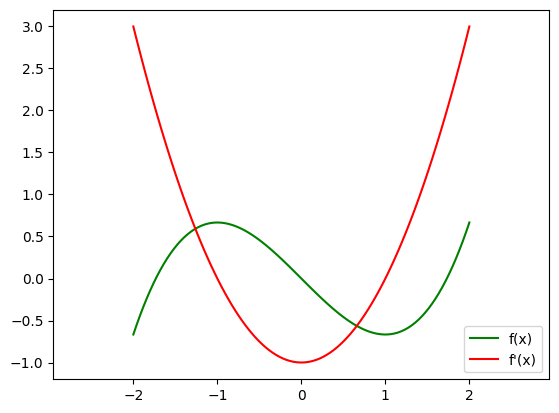

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return (1/3)*x**3 - x

def f_der(x):
    return x**2 - 1

x = np.linspace(-2, 2, 100) # linearly spaced array
y = f(x)
y_der = f_der(x)

fig, ax = plt.subplots()
ax.axis("equal") # lik skala på x- og y-akse
ax.plot(x, y, label='f(x)', color="green")
ax.plot(x, y_der, label="f'(x)", color="red")
ax.legend()
plt.show


Men numerisk derivasjon har mange fordeler:
- kan regne ut derivert for funksjoner som er vanskelige å derivere symbolsk
- kan regne ut derivert selv om vi __ikke__ kjenner funksjonsuttrykket
    - f.eks. har en serie måleresultater over et tidsintervall
    - uten å vite hvilken funksjon f(t) måleverdiene følger

## Numerisk beregning av den deriverte (kjent funksjon)
En tilnærmet verdi for den deriverte kan finnes ved å se på 
- stigningen av funksjonen fra ønsket x-verdi og til en nærliggende x-verdi
- Intervallet mellom x-verdi og den nærliggende verdien kalles gjerne __h__ (eller __dx__) i kode for numeriske beregninger.

Tre ulike formler:
- den venstrederiverte: $f'(x) = \frac{f(x) - f(x-dx)}{dx}$

- den høyrederiverte: $f'(x) = \frac{f(x+dx) - f(x)}{dx}$

- den sentralderiverte: $f'(x) = \frac{f(x+dx) - f(x-dx)}{2dx}$

![](images/derivatives.jpg)

Koden under plotter høyre-, venstre- og sentral deriverte __numerisk__:

<function matplotlib.pyplot.show(close=None, block=None)>

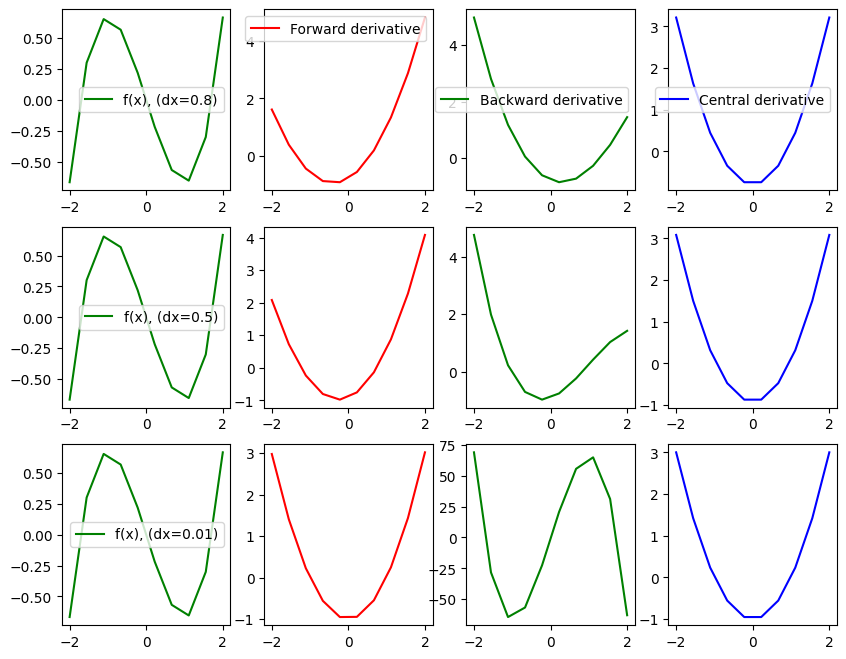

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return (1/3)*x**3 - x

def ff_der(x, dx):
    '''Forward difference approximation of the derivative'''
    return (f(x + dx) - f(x))/dx


def fb_der(x, dx):
    '''Backward difference approximation of the derivative'''
    return f(x)-(f(x - dx))/dx


def fc_der(x, dx):
    '''Central difference approximation of the derivative'''
    return (f(x + dx) - f(x-dx))/(2*dx)


x = np.linspace(-2, 2, 100)
y = f(x)


fig, ax = plt.subplots(3,4)
fig.set_size_inches(10,8)

dx = 0.8
ax[0,0].plot(x, y, label=f'f(x), (dx={dx})', color="green")
ax[0,0].legend()
ax[0,1].plot(x, ff_der(x,dx), label="Forward derivative", color="red")
ax[0,1].legend()
ax[0,2].plot(x, fb_der(x,dx), label="Backward derivative", color="green")
ax[0,2].legend()
ax[0,3].plot(x, fc_der(x,dx), label="Central derivative", color="blue")
ax[0,3].legend()

dx = 0.5
ax[1,0].plot(x, y, label=f'f(x), (dx={dx})', color="green")
ax[1,0].legend()
ax[1,1].plot(x, ff_der(x,dx), color="red")
ax[1,2].plot(x, fb_der(x,dx), color="green")
ax[1,3].plot(x, fc_der(x,dx), color="blue")


dx = 0.01
ax[2,0].plot(x, y, label=f'f(x), (dx={dx})', color="green")
ax[2,0].legend()
ax[2,1].plot(x, ff_der(x,dx), color="red")
ax[2,2].plot(x, fb_der(x,dx), color="green")
ax[2,3].plot(x, fc_der(x,dx), color="blue")

plt.show

Sentralderiverte normalt mest nøyaktig

## Numerisk derivasjon (ukjent funksjonsuttrykk)
I dette tilfellet kjenner vi ikke funksjonsuttrykket
- men har f.eks. bare en serie måleresultat

Antar her at vi har en numpy-array med to rader, hvor
- første rad er en jevn serie av verdier
    - f.eks. t-verdier hvis vi gjorde målinger med jevne tidsintervall
- andre rad er de målte verdiene
    - f.eks. trykk, temperatur, fart, ... alt etter hva målingen handlet om
    
Her trenger vi ikke i samme grad lure på hvilken h vi skal bruke
- har uansett bare de tallene vi har
- like greit å bruke korteste intervall
    - med mindre de er kortere enn $10^{-6}$

     tid_s  posisjon_m
0  0.00000    0.000000
1  0.01001    0.000060
2  0.02002    0.000240
3  0.03003    0.000541
4  0.04004    0.000962


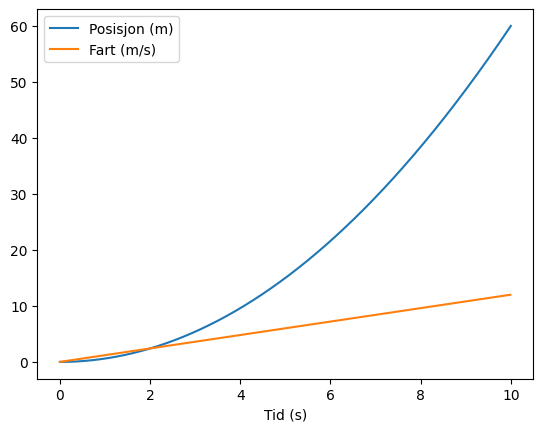

In [1]:
# Source: https://progmod.no/docs/tema4_algoritmer/derivasjon.html

import matplotlib.pyplot as plt
import pandas as pd

# Leser og sjekker ut dataene
data = pd.read_csv("https://raw.githubusercontent.com/andreasdh/NAT3000/master/docs/datafiler/posisjon.txt")

print(data.head())

x = data["tid_s"]
y = data["posisjon_m"]


dydx = []
for i in range(len(y)-1):
    dy = y[i+1]-y[i]
    dx = x[i+1]-x[i]
    dydx.append(dy/dx)

dydx.append(None)
plt.plot(x, y, label='Posisjon (m)')
plt.plot(x, dydx, label='Fart (m/s)')
plt.xlabel('Tid (s)')
plt.legend()
plt.show()